In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set_theme()

In [2]:
#setting plotting and display options
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

# Dataset chosen from Kaggle: Reservation Cancellation Prediction dataset
### https://www.kaggle.com/competitions/playground-series-s3e7/data

In [3]:
#data pre-processing
data=pd.read_csv('train.csv',index_col=0)

#booking_status is the target (e.g., whether the reservation was cancelled)

# Data preprocessing
### 1. Missing value imputation
### 2. Feature scaling
### 3. Encoding categorical variables
### 4. Split the dataset into training and validation sets

In [4]:
data.isna().all()
#all columns return false, therefore no missing values

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [5]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [6]:
data.describe()
# the big spread in mean, min and max shows that we will definitely be scaling our features

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


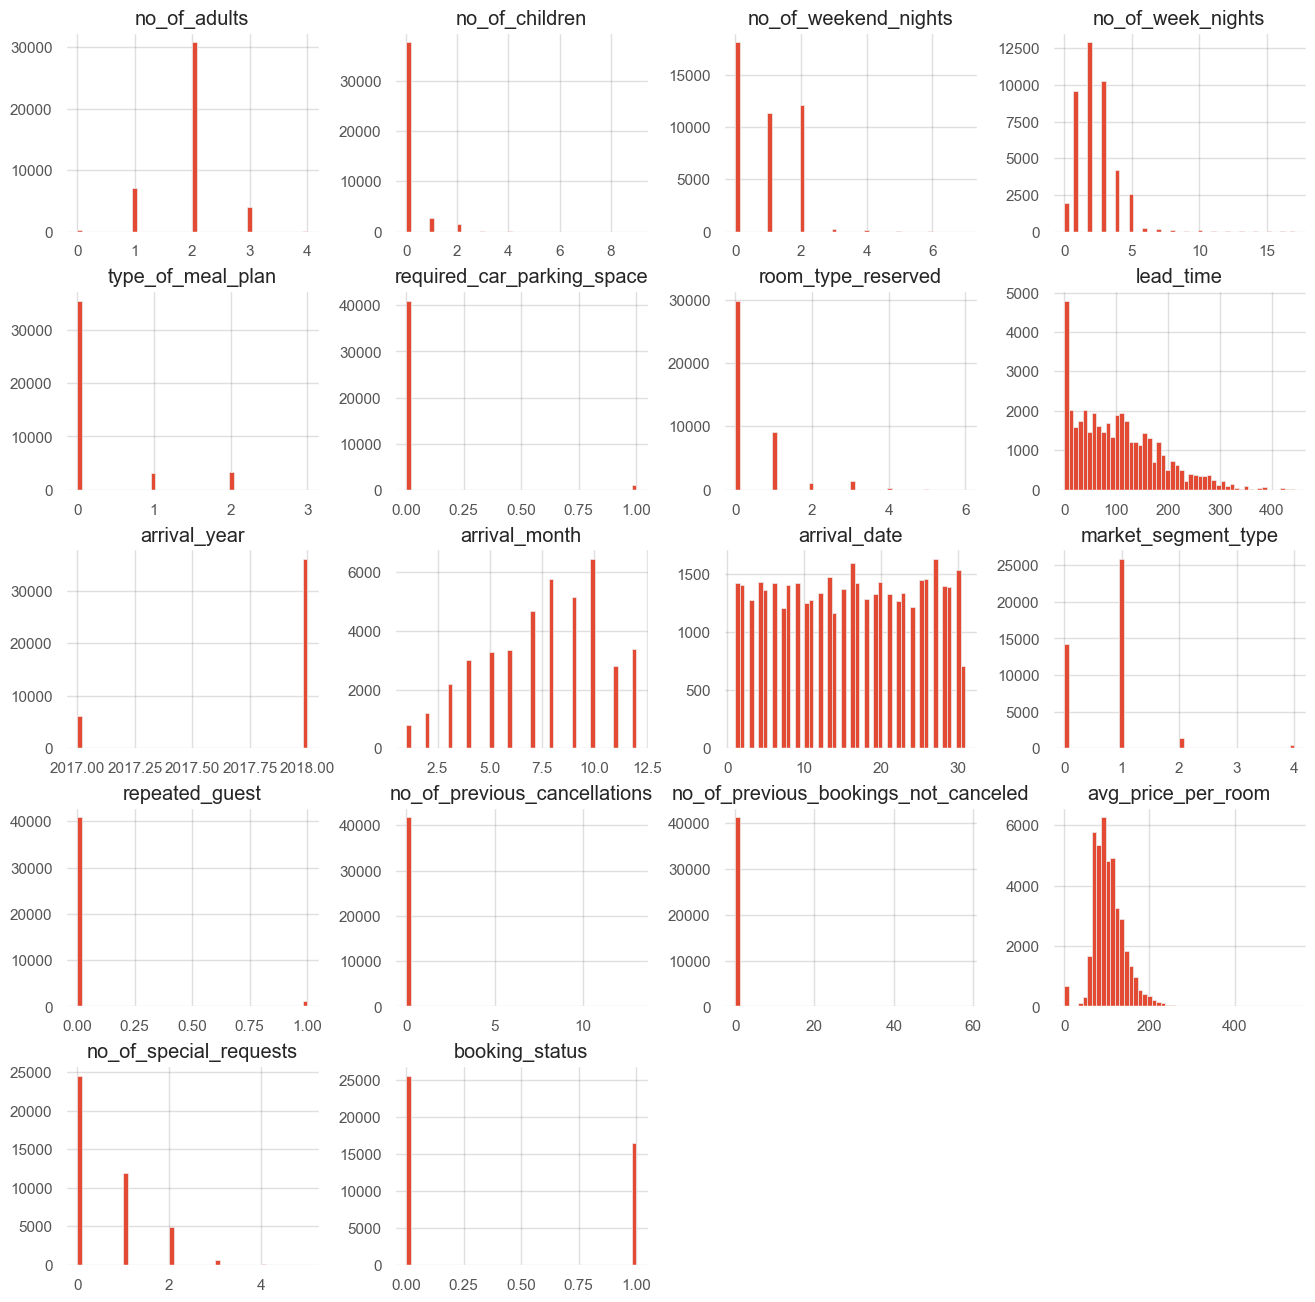

In [7]:
#EDA to see distribution of features
data.hist(bins = 50,
          sharex = False,
          sharey = False,
          figsize = (16, 16)
         )
plt.show()

In [8]:
y=data['booking_status']
X = data.drop('booking_status', axis=1)

# Perform feature scaling on X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
np.unique(y)
#checking that label is already categorical variables

array([0, 1], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2023)

# Fit an unregularized logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression
unreg_log_reg=LogisticRegression(solver='saga', max_iter=10000)

unreg_log_reg.fit(x_train, y_train)
print(unreg_log_reg.intercept_, unreg_log_reg.coef_)

[-0.724] [[ 0.034  0.04   0.069  0.05   0.03  -0.255 -0.248  0.968  0.196 -0.056
   0.034  0.738 -0.756  0.041  0.02   0.711 -0.918]]


In [12]:
# create a dataframe for the coefficients
coeff_df = pd.DataFrame({'feature': X.columns, 'coefficient': unreg_log_reg.coef_[0]})

# display the dataframe
print(coeff_df)

                                 feature  coefficient
0                           no_of_adults     0.034374
1                         no_of_children     0.040148
2                   no_of_weekend_nights     0.069239
3                      no_of_week_nights     0.049842
4                      type_of_meal_plan     0.029547
5             required_car_parking_space    -0.254877
6                     room_type_reserved    -0.247873
7                              lead_time     0.967744
8                           arrival_year     0.196352
9                          arrival_month    -0.056465
10                          arrival_date     0.033575
11                   market_segment_type     0.737987
12                        repeated_guest    -0.755751
13          no_of_previous_cancellations     0.040833
14  no_of_previous_bookings_not_canceled     0.019680
15                    avg_price_per_room     0.711093
16                no_of_special_requests    -0.917798


# Apply L1 (Lasso), L2 (Ridge), and Elastic Net regularization

### Experimentng with different regularization strengths: C -inverse of regularization strength (hyper-parameter tuning)


-------------------------------------------------------------------- Lasso-----------------------------------------------------------------------------------------

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Define the parameter grid to search over
param_grid_lasso = {'C': [0.001, 0.01, 0.1, 1, 10,50,100]}

# Create a L1 logistic regression model
lasso_log_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
lasso_grid_search  = GridSearchCV(lasso_log_reg, param_grid_lasso, cv=cv)

# Fit the grid search object to the training data
lasso_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
lasso_scores = cross_val_score(lasso_grid_search.best_estimator_, x_train, y_train, cv=cv)
lasso_mean_score = np.mean(lasso_scores)
lasso_std_score = np.std(lasso_scores)

print(lasso_mean_score,lasso_std_score)

# Print the best value of C found by the grid search
print('Best C:', lasso_grid_search.best_params_['C'])

# Fit a new logistic regression model with best value of C
lasso_log_reg_best = LogisticRegression(penalty='l1', C=lasso_grid_search.best_params_['C'], solver='saga', max_iter=10000)
lasso_log_reg_best.fit(x_train, y_train)
print(lasso_log_reg_best.intercept_, lasso_log_reg_best.coef_)

0.7692568713946387 0.010812806811668848
Best C: 50
[-0.725] [[ 0.034  0.04   0.069  0.05   0.03  -0.255 -0.248  0.968  0.196 -0.057
   0.034  0.738 -0.761  0.042  0.022  0.712 -0.918]]


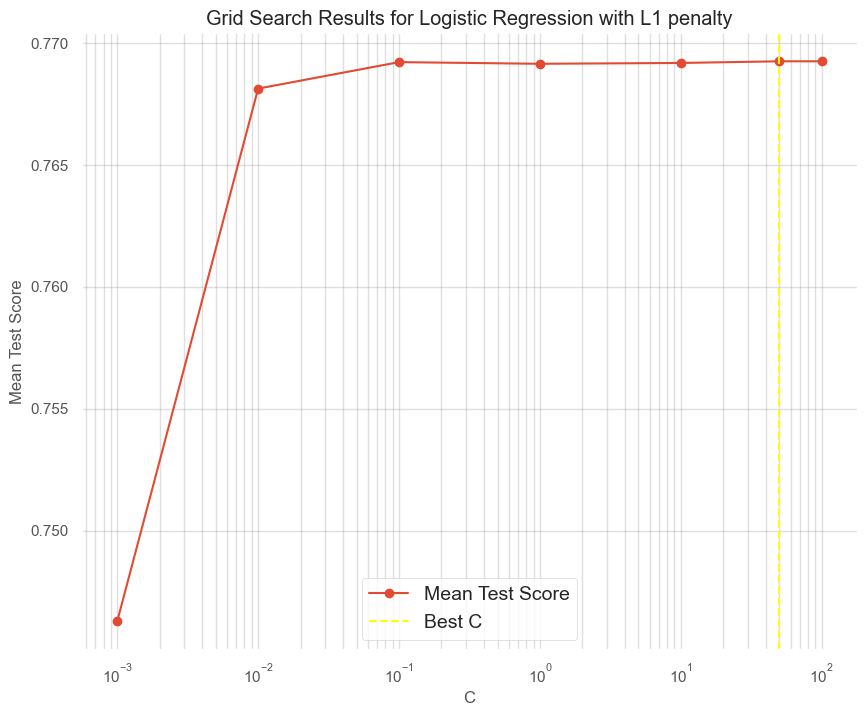

In [32]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid_lasso['C'], lasso_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')
ax.axvline(x=lasso_grid_search.best_params_['C'], color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with L1 penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [15]:
# create a dataframe for the coefficients
coeff_df_lasso = pd.DataFrame({'feature': X.columns, 'coefficient': lasso_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_lasso)

                                 feature  coefficient
0                           no_of_adults     0.034308
1                         no_of_children     0.040145
2                   no_of_weekend_nights     0.069271
3                      no_of_week_nights     0.049823
4                      type_of_meal_plan     0.029500
5             required_car_parking_space    -0.255008
6                     room_type_reserved    -0.248125
7                              lead_time     0.968126
8                           arrival_year     0.196295
9                          arrival_month    -0.056534
10                          arrival_date     0.033595
11                   market_segment_type     0.738487
12                        repeated_guest    -0.761272
13          no_of_previous_cancellations     0.041745
14  no_of_previous_bookings_not_canceled     0.021896
15                    avg_price_per_room     0.711536
16                no_of_special_requests    -0.918269


-------------------------------------------------------------------- Ridge-----------------------------------------------------------------------------------------

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100]}

# Create a L1 logistic regression model
ridge_log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
ridge_grid_search = GridSearchCV(ridge_log_reg, param_grid, cv=5)

# Fit the grid search object to the training data
ridge_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
ridge_scores = cross_val_score(ridge_grid_search.best_estimator_, x_train, y_train, cv=cv)
ridge_mean_score = np.mean(ridge_scores)
ridge_std_score = np.std(ridge_scores)

# Print the best value of C found by the grid search
print('Best C:', ridge_grid_search.best_params_['C'])

# Fit a new logistic regression model with best value of C
ridge_log_reg_best = LogisticRegression(penalty='l1', C=ridge_grid_search.best_params_['C'], solver='saga', max_iter=10000)
ridge_log_reg_best.fit(x_train, y_train)
print(ridge_log_reg_best.intercept_, ridge_log_reg_best.coef_)

Best C: 0.1
[-0.715] [[ 0.032  0.036  0.067  0.048  0.028 -0.25  -0.241  0.964  0.195 -0.054
   0.032  0.731 -0.689  0.     0.     0.706 -0.912]]


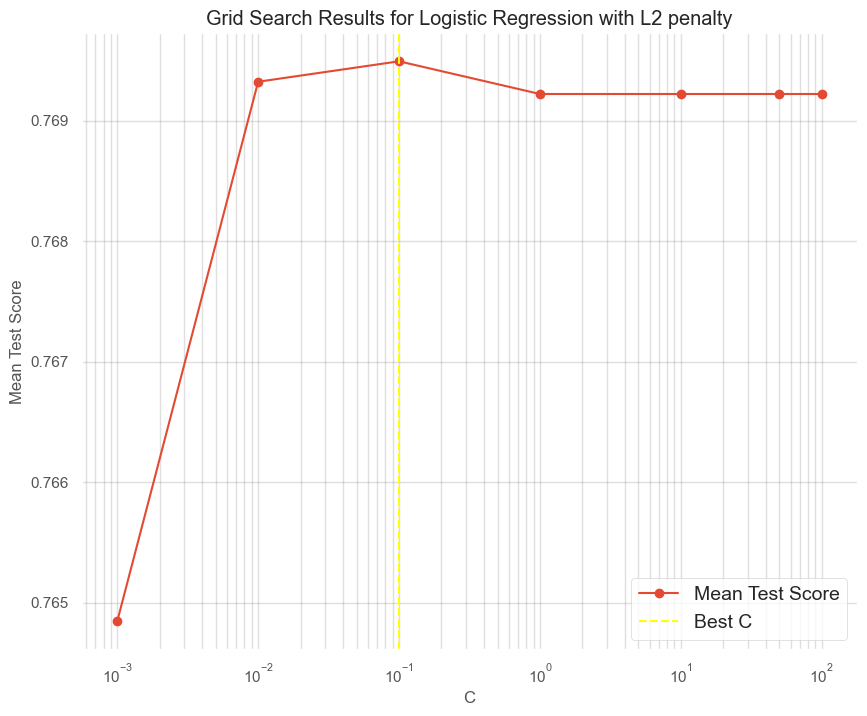

In [17]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid['C'], ridge_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')
ax.axvline(x=0.1, color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with L2 penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [18]:
# create a dataframe for the coefficients
coeff_df_ridge = pd.DataFrame({'feature': X.columns, 'coefficient': ridge_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_ridge)

                                 feature  coefficient
0                           no_of_adults     0.032231
1                         no_of_children     0.035999
2                   no_of_weekend_nights     0.067397
3                      no_of_week_nights     0.048093
4                      type_of_meal_plan     0.027585
5             required_car_parking_space    -0.250282
6                     room_type_reserved    -0.240966
7                              lead_time     0.964251
8                           arrival_year     0.195005
9                          arrival_month    -0.054098
10                          arrival_date     0.031547
11                   market_segment_type     0.731236
12                        repeated_guest    -0.689142
13          no_of_previous_cancellations     0.000000
14  no_of_previous_bookings_not_canceled     0.000000
15                    avg_price_per_room     0.706318
16                no_of_special_requests    -0.911798


-------------------------------------------------------------------- Elastic Net-----------------------------------------------------------------------------------

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100]}

# Create a L1 logistic regression model
elastic_net_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
elastic_net_grid_search = GridSearchCV(ridge_log_reg, param_grid, cv=5)

# Fit the grid search object to the training data
elastic_net_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
elastic_net_scores = cross_val_score(elastic_net_grid_search.best_estimator_, x_train, y_train, cv=cv)
elastic_net_mean_score = np.mean(ridge_scores)
elastic_net_std_score = np.std(ridge_scores)

# Print the best value of C found by the grid search
print('Best C:', elastic_net_grid_search.best_params_['C'])

# Fit a new logistic regression model with best value of C
elastic_net_log_reg_best = LogisticRegression(penalty='l1', C=elastic_net_grid_search.best_params_['C'], solver='saga', max_iter=10000)
elastic_net_log_reg_best.fit(x_train, y_train)
print(elastic_net_log_reg_best.intercept_, elastic_net_log_reg_best.coef_)

Best C: 0.1
[-0.715] [[ 0.032  0.036  0.067  0.048  0.028 -0.25  -0.241  0.964  0.195 -0.054
   0.032  0.731 -0.689  0.     0.     0.706 -0.912]]


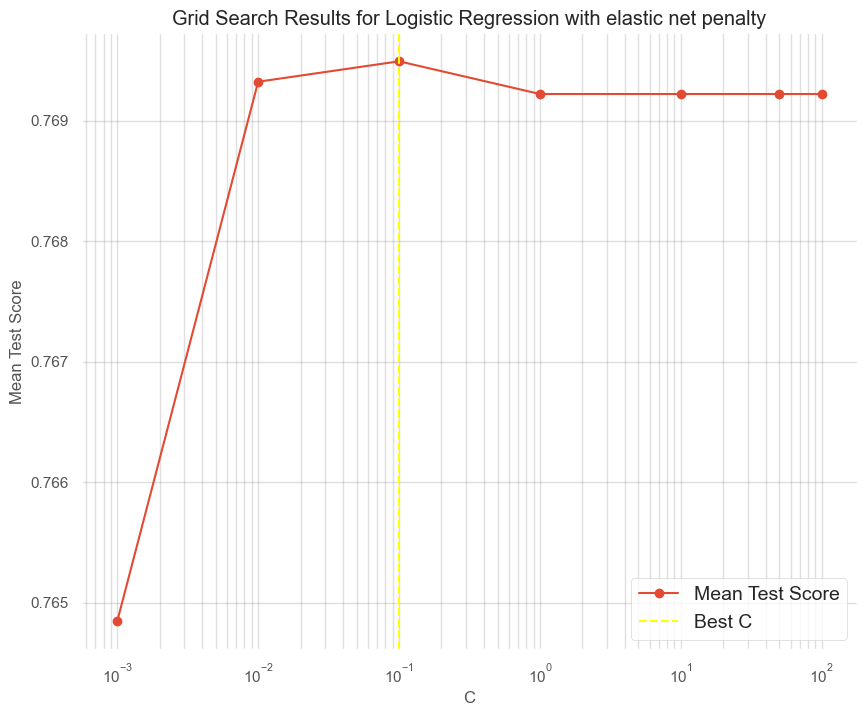

In [20]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid['C'], elastic_net_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')
ax.axvline(x=0.1, color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with elastic net penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [21]:
# create a dataframe for the coefficients
coeff_df_elastic_net = pd.DataFrame({'feature': X.columns, 'coefficient': elastic_net_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_elastic_net)

                                 feature  coefficient
0                           no_of_adults     0.032232
1                         no_of_children     0.035999
2                   no_of_weekend_nights     0.067397
3                      no_of_week_nights     0.048093
4                      type_of_meal_plan     0.027585
5             required_car_parking_space    -0.250282
6                     room_type_reserved    -0.240965
7                              lead_time     0.964251
8                           arrival_year     0.195004
9                          arrival_month    -0.054098
10                          arrival_date     0.031547
11                   market_segment_type     0.731235
12                        repeated_guest    -0.689113
13          no_of_previous_cancellations     0.000000
14  no_of_previous_bookings_not_canceled     0.000000
15                    avg_price_per_room     0.706319
16                no_of_special_requests    -0.911798


# Model comparison and discussion

In [22]:
# Compare the performance of the three models
print('Lasso mean cross-validation score:', lasso_mean_score, '+/-', lasso_std_score)
print('Ridge mean cross-validation score:', ridge_mean_score,'+/-', ridge_std_score)
print('Elastic Net mean cross-validation score:', elastic_net_mean_score, '+/-', elastic_net_std_score)

#from their cross-val score, it doesn't say much which model is actually better

Lasso mean cross-validation score: 0.7692568713946387 +/- 0.010812806811668848
Ridge mean cross-validation score: 0.7692568713946387 +/- 0.010605293440443862
Elastic Net mean cross-validation score: 0.7692568713946387 +/- 0.010605293440443862


In [23]:
# Make predictions on the test data for each of the L1, L2, elastic net model
y_pred_lasso = lasso_log_reg_best.predict(x_test)
y_pred_ridge = ridge_log_reg_best.predict(x_test)
y_pred_elastic_net = elastic_net_log_reg_best.predict(x_test)

# Print the classification report and accuracy score
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_lasso))
print('Accuracy:', accuracy_score(y_test, y_pred_lasso))

print(classification_report(y_test, y_pred_ridge))
print('Accuracy:', accuracy_score(y_test, y_pred_ridge))

print(classification_report(y_test, y_pred_elastic_net))
print('Accuracy:', accuracy_score(y_test, y_pred_elastic_net))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy: 0.7655581947743468
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy: 0.7657957244655582
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg    

# Feature selection

### Comparing the coefficients of the different models.

In [24]:
# Merge the dataframes on the 'feature' column
coeff_df = coeff_df_lasso.merge(coeff_df_ridge, on='feature').merge(coeff_df_elastic_net, on='feature')

# Rename the column headers
coeff_df = coeff_df.rename(columns={'coefficient_x': 'lasso', 'coefficient_y': 'ridge', 'coefficient': 'elastic_net'})

# Display the renamed dataframe
coeff_df

,feature,lasso,ridge,elastic_net
0,no_of_adults,0.034308,0.032231,0.032232
1,no_of_children,0.040145,0.035999,0.035999
2,no_of_weekend_nights,0.069271,0.067397,0.067397
3,no_of_week_nights,0.049823,0.048093,0.048093
4,type_of_meal_plan,0.029500,0.027585,0.027585
5,required_car_parking_space,-0.255008,-0.250282,-0.250282
6,room_type_reserved,-0.248125,-0.240966,-0.240965
7,lead_time,0.968126,0.964251,0.964251
8,arrival_year,0.196295,0.195005,0.195004
9,arrival_month,-0.056534,-0.054098,-0.054098
